# <span style="color: #e3db24;">00 | Libraries and Settings</span>

In [2]:
# 📕📗📘 Basic Libraries
import pandas as pd
import glob
import numpy as np
from numpy import rec
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# 🛞 Machine Learning
import xgboost as xgb
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
# 🙌 Settings
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.float_format', '{:,.2f}'.format)
import warnings
warnings.filterwarnings('ignore') # ignore warnings

# <span style="color: #e3db24;">01 | Data Extraction and Exploration</span>


<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Next Steps: Merge all excel files on the column "country"</strong>
<p>I have extracted 20 excel files containing data on female labour and indicators which might be connected to it from the OECD Family Database and the Eurostat Labour Force Survey. Each file contains at least two columns, some several. Each table contains the column "country". In the following, I will create one dataframe for all the data and merge them on their common column "country".</p>
</div>

In [4]:
folder_path = "data/edited_data"  # path to folder containing the data
file_pattern = f"{folder_path}/*.xlsx" # pattern to identify data

excel_files = glob.glob(file_pattern) # list of all excel files in this folder, the globe library finds every file according to the pattern

if len(excel_files) == 0: # raising an error if there are no excel files
    raise FileNotFoundError("No excel files found in this directory.")

merged_df = pd.read_excel(excel_files[0]) # import the first file

for file in excel_files[1:]: # iterate over all the other files and merging them one after the other
    df = pd.read_excel(file)
    merged_df = pd.merge(merged_df, df, on="country", how="outer")  # all rows, not only with countries from the first file

<h2 style="color: #ec7511;">Exploring the Data (First Impressions)</h2>

In [5]:
merged_df.shape

(64, 37)

In [6]:
merged_df.columns

Index(['country', '%_male_users_parental_leave_2021',
       'avg_number_children_per_woman_2021', 'emp_rate_women', 'empl_rate_men',
       'employment_rate_partnered_mothers_2021',
       'employment_rate_single_mothers_2021',
       'fathers_empl_rate_child_younger_than_6_2023',
       'mothers_empl_rate_child_younger_than_6_2023',
       'fathers_empl_rate_child6-11_2023', 'mothers_empl_rate_child6-11_2023',
       'gender_gap_ft_equivalent_employment_rate_2021', 'gender-pay-gap_2023',
       'maternal_emp_rate_low_edu_2024', 'maternal_emp_rate_med_edu_2024',
       'maternal_emp_rate_high_edu_2024', 'maternal_emp_rate_w_1_child_0-14',
       'maternal_emp_rate_w_2_child_0-14',
       'maternal_emp_rate_w_more_than_2_child_0-14', 'maternal_emp_rate',
       'maternal_pt_emp_rate', 'maternal_ft_emp_rate',
       'mean_age_women_first_birth_2020',
       'paternal_number_weeks_full_paid_leave',
       'maternal_number_weeks_full_paid_leave', 'number_households_0_child',
       'numbe

In [7]:
merged_df.head(10)

,country,%_male_users_parental_leave_2021,avg_number_children_per_woman_2021,emp_rate_women,empl_rate_men,employment_rate_partnered_mothers_2021,employment_rate_single_mothers_2021,fathers_empl_rate_child_younger_than_6_2023,mothers_empl_rate_child_younger_than_6_2023,fathers_empl_rate_child6-11_2023,mothers_empl_rate_child6-11_2023,gender_gap_ft_equivalent_employment_rate_2021,gender-pay-gap_2023,maternal_emp_rate_low_edu_2024,maternal_emp_rate_med_edu_2024,maternal_emp_rate_high_edu_2024,maternal_emp_rate_w_1_child_0-14,maternal_emp_rate_w_2_child_0-14,maternal_emp_rate_w_more_than_2_child_0-14,maternal_emp_rate,maternal_pt_emp_rate,maternal_ft_emp_rate,mean_age_women_first_birth_2020,paternal_number_weeks_full_paid_leave,maternal_number_weeks_full_paid_leave,number_households_0_child,number_households_1_child,number_households_2_child,number_households_more_than_2_child,share_empl_pt_women,share_empl_pt_men,public_spending_early_childhood_education_care_%GDP_2019,public_spending_family_benefits_total_%GDP_2019,spending_education,spending_on_education_%GDP_2021,spending_family_benefits,rate_women_managers_2021
0,Argentina,NaN,1.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,0.51,1.70,NaN,NaN,74.74,59.37,NaN,NaN,NaN,NaN,23.73,11.35,..,..,..,..,..,..,72.18,37.10,35.07,29.60,0.92,8.30,..,..,..,..,NaN,NaN,0.64,2.34,NaN,3.99,NaN,40.00
2,Austria,3.56,1.48,70.30,77.90,75.83,73.27,93,74.80,92.20,81.90,22.48,12.14,48.42,76.71,83.64,79.26,76.70,56.33,75.56,40.38,35.18,29.70,9.39,51.20,74.07,12.81,9.72,3.39,50.10,12.20,0.55,2.54,1.93,3.04,2.70,35.50
3,Belgium,33.16,1.60,63.30,69.90,77.99,64.04,88.10,71.50,87.10,73,16.18,1.11,38.24,70.41,89.88,79.92,78.79,54.06,75.53,19.72,55.63,29.20,6.65,15.05,67.43,13.85,12.72,6.01,38.10,10.70,0.81,3.18,2.37,4.10,2.06,35.40
4,Bosnia and Herzegovina,NaN,NaN,39.10,64.40,NaN,NaN,90.90,45.50,84.50,49.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.90,2.80,NaN,NaN,NaN,NaN,NaN,NaN
5,Brazil,NaN,1.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.70
6,Bulgaria,NaN,1.58,67.40,73.90,71.95,67.10,88.30,66.20,87.20,73.70,8.70,8.81,33.40,71.01,88.94,75.71,66.80,40.88,71.13,0.61,68.52,26.40,1.93,73.14,74.72,14.85,9.05,1.38,1.50,1.30,NaN,NaN,1.65,2.38,1.59,38.30
7,Canada,23.51,1.43,NaN,NaN,77.16,74.32,NaN,NaN,NaN,NaN,NaN,16.14,44.40,64.07,80.79,..,..,..,76.77,14.84,61.93,..,2.02,19.89,..,..,..,..,NaN,NaN,NaN,1.87,NaN,3.25,NaN,35.60
8,Chile,NaN,1.54,NaN,NaN,53.24,69.77,NaN,NaN,NaN,NaN,25.09,15.37,..,..,..,60.59,57.87,54.35,59.38,11.62,47.72,..,1,30,..,..,..,..,NaN,NaN,0.63,1.76,NaN,3.44,NaN,30.40
9,China,NaN,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
merged_df.sample(10)

,country,%_male_users_parental_leave_2021,avg_number_children_per_woman_2021,emp_rate_women,empl_rate_men,employment_rate_partnered_mothers_2021,employment_rate_single_mothers_2021,fathers_empl_rate_child_younger_than_6_2023,mothers_empl_rate_child_younger_than_6_2023,fathers_empl_rate_child6-11_2023,mothers_empl_rate_child6-11_2023,gender_gap_ft_equivalent_employment_rate_2021,gender-pay-gap_2023,maternal_emp_rate_low_edu_2024,maternal_emp_rate_med_edu_2024,maternal_emp_rate_high_edu_2024,maternal_emp_rate_w_1_child_0-14,maternal_emp_rate_w_2_child_0-14,maternal_emp_rate_w_more_than_2_child_0-14,maternal_emp_rate,maternal_pt_emp_rate,maternal_ft_emp_rate,mean_age_women_first_birth_2020,paternal_number_weeks_full_paid_leave,maternal_number_weeks_full_paid_leave,number_households_0_child,number_households_1_child,number_households_2_child,number_households_more_than_2_child,share_empl_pt_women,share_empl_pt_men,public_spending_early_childhood_education_care_%GDP_2019,public_spending_family_benefits_total_%GDP_2019,spending_education,spending_on_education_%GDP_2021,spending_family_benefits,rate_women_managers_2021
11,Costa Rica,NaN,1.53,NaN,NaN,40.93,65.03,NaN,NaN,NaN,NaN,38.96,4.21,..,..,..,51.46,45.43,35.23,47.37,14.74,32.63,..,1.60,17.33,30.29,23.08,24.61,22.02,NaN,NaN,0.32,1.02,NaN,4.00,NaN,NaN
53,Slovak Republic,NaN,1.63,NaN,NaN,75.22,74.77,NaN,NaN,NaN,NaN,10.96,13.81,20.66,75.25,85.23,79.11,74.55,55.36,75.17,4.08,71.04,27.20,21,68.88,62.81,17.27,15.23,4.69,NaN,NaN,0.65,2.14,NaN,3.27,NaN,37.30
50,Russian Federation,NaN,2.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Poland,0.96,1.33,66.90,77.80,71.52,68.06,95.10,73.30,93.30,80.10,17.39,10.17,41.20,64.57,88.67,75.52,68.60,57.11,71.04,4.37,63.04,27.90,8.30,40.30,61.61,18.47,15.16,4.76,8.40,3.40,0.58,3.35,2.08,3.34,3.23,43.00
60,Turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.69,20.79,19.73,13.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,China,NaN,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Chile,NaN,1.54,NaN,NaN,53.24,69.77,NaN,NaN,NaN,NaN,25.09,15.37,..,..,..,60.59,57.87,54.35,59.38,11.62,47.72,..,1,30,..,..,..,..,NaN,NaN,0.63,1.76,NaN,3.44,NaN,30.40
2,Austria,3.56,1.48,70.30,77.90,75.83,73.27,93,74.80,92.20,81.90,22.48,12.14,48.42,76.71,83.64,79.26,76.70,56.33,75.56,40.38,35.18,29.70,9.39,51.20,74.07,12.81,9.72,3.39,50.10,12.20,0.55,2.54,1.93,3.04,2.70,35.50
1,Australia,0.51,1.70,NaN,NaN,74.74,59.37,NaN,NaN,NaN,NaN,23.73,11.35,..,..,..,..,..,..,72.18,37.10,35.07,29.60,0.92,8.30,..,..,..,..,NaN,NaN,0.64,2.34,NaN,3.99,NaN,40.00
45,OECD average,NaN,1.58,NaN,NaN,74.30,71.39,NaN,NaN,NaN,NaN,19.61,11.43,47.24,69.46,83.27,72.89,71.32,60.12,71.40,17.08,54.08,NaN,-,-,67.57,14.72,12.65,5.07,NaN,NaN,0.75,2.29,NaN,3.46,NaN,33.70


In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 37 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   country                                                   64 non-null     object 
 1   %_male_users_parental_leave_2021                          22 non-null     float64
 2   avg_number_children_per_woman_2021                        54 non-null     object 
 3   emp_rate_women                                            36 non-null     object 
 4   empl_rate_men                                             36 non-null     object 
 5   employment_rate_partnered_mothers_2021                    44 non-null     object 
 6   employment_rate_single_mothers_2021                       44 non-null     object 
 7   fathers_empl_rate_child_younger_than_6_2023               35 non-null     object 
 8   mothers_empl_rate_chil

In [10]:
merged_df.dtypes

country                                                      object
%_male_users_parental_leave_2021                            float64
avg_number_children_per_woman_2021                           object
emp_rate_women                                               object
empl_rate_men                                                object
employment_rate_partnered_mothers_2021                       object
employment_rate_single_mothers_2021                          object
fathers_empl_rate_child_younger_than_6_2023                  object
mothers_empl_rate_child_younger_than_6_2023                  object
fathers_empl_rate_child6-11_2023                             object
mothers_empl_rate_child6-11_2023                             object
gender_gap_ft_equivalent_employment_rate_2021               float64
gender-pay-gap_2023                                         float64
maternal_emp_rate_low_edu_2024                               object
maternal_emp_rate_med_edu_2024                  

In [11]:
merged_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,64,64,Argentina,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
%_male_users_parental_leave_2021,22.00,NaN,NaN,NaN,25.28,17.39,0.51,7.10,24.86,41.84,53.30
avg_number_children_per_woman_2021,54.00,50.00,1.58,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_rate_women,36.00,33.00,70.30,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
empl_rate_men,36.00,34.00,73.90,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_rate_partnered_mothers_2021,44,41,..,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_rate_single_mothers_2021,44,41,..,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fathers_empl_rate_child_younger_than_6_2023,35,30,:,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mothers_empl_rate_child_younger_than_6_2023,35,32,:,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fathers_empl_rate_child6-11_2023,35,31,:,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
merged_df.isnull().sum()

country                                                      0
%_male_users_parental_leave_2021                            42
avg_number_children_per_woman_2021                          10
emp_rate_women                                              28
empl_rate_men                                               28
employment_rate_partnered_mothers_2021                      20
employment_rate_single_mothers_2021                         20
fathers_empl_rate_child_younger_than_6_2023                 29
mothers_empl_rate_child_younger_than_6_2023                 29
fathers_empl_rate_child6-11_2023                            29
mothers_empl_rate_child6-11_2023                            29
gender_gap_ft_equivalent_employment_rate_2021               22
gender-pay-gap_2023                                         17
maternal_emp_rate_low_edu_2024                              19
maternal_emp_rate_med_edu_2024                              19
maternal_emp_rate_high_edu_2024                        

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions: ...</strong>
<p>TEXT</p>
    <ul>
        <li>TEXT</li>
        <li>TEXT</li>
        <li>TEXT</li>
        <li>TEXT</li>
    </ul>
</div>

# <span style="color: #e3db24;">02 | Data Cleaning</span>

## <span style="color: #ec7511;">Country Selection</span>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Next Steps: Keeping only EU countries</strong>
<p>After checking the number of missing values, I decided to do the main analysis only on EU countries as the data is most complete and it allows a coherent approach as the selection of countries is based on a speicific condition (EU membership).</p>
</div>

In [13]:
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", "Korea", "Latvia", "Lithuania", "Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway", "Poland", "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "United Kingdom", "United States"]
eu_countries = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"]

In [14]:
oecd_df = merged_df[merged_df['country'].isin(oecd_countries)]
print(oecd_df.shape)
print(oecd_df.isna().sum())

(38, 37)
country                                                      0
%_male_users_parental_leave_2021                            16
avg_number_children_per_woman_2021                           1
emp_rate_women                                              15
empl_rate_men                                               15
employment_rate_partnered_mothers_2021                       1
employment_rate_single_mothers_2021                          1
fathers_empl_rate_child_younger_than_6_2023                 16
mothers_empl_rate_child_younger_than_6_2023                 16
fathers_empl_rate_child6-11_2023                            16
mothers_empl_rate_child6-11_2023                            16
gender_gap_ft_equivalent_employment_rate_2021                3
gender-pay-gap_2023                                          2
maternal_emp_rate_low_edu_2024                               1
maternal_emp_rate_med_edu_2024                               1
maternal_emp_rate_high_edu_2024               

In [15]:
eu_df = merged_df[merged_df['country'].isin(eu_countries)]
print(eu_df.shape)
print(eu_df.isna().sum())

(27, 37)
country                                                      0
%_male_users_parental_leave_2021                            14
avg_number_children_per_woman_2021                           2
emp_rate_women                                               0
empl_rate_men                                                0
employment_rate_partnered_mothers_2021                       2
employment_rate_single_mothers_2021                          2
fathers_empl_rate_child_younger_than_6_2023                  0
mothers_empl_rate_child_younger_than_6_2023                  0
fathers_empl_rate_child6-11_2023                             0
mothers_empl_rate_child6-11_2023                             0
gender_gap_ft_equivalent_employment_rate_2021                2
gender-pay-gap_2023                                          1
maternal_emp_rate_low_edu_2024                               2
maternal_emp_rate_med_edu_2024                               2
maternal_emp_rate_high_edu_2024               

## <span style="color: #ec7511;">Feature Selection</span>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Dropping Features</strong>
    <ul>
        <li>"%_male_users_parental_leave_2021": will be dropped from the eu_df because of the high number of NaNs</li>
        <li>All other columns will be kept for now to analyze differences between countries and influence factors on female and maternal employment.</li>
    </ul>
</div>

In [16]:
eu_df = eu_df.drop(columns=["%_male_users_parental_leave_2021"])
eu_df.shape

(27, 36)

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #0df722;
    border-radius: 4px;
    background-color: #0df794;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Extra Analysis on Paternal Leave:</strong> I will do an extra analysis on "%_male_users_parental_leave_2021" based on the countries which provide numbers for this. I expect the number of fathers who take a paternal leave to have influence on the employment rate and amount of mothers. Therefore, I will analyse the relationship between this column and the columns "maternal_emp_rate", "maternal_pt_emp_rate" and "maternal_ft_emp_rate".
</div>

In [17]:
df_paternal_leave = merged_df[merged_df["%_male_users_parental_leave_2021"].notna()]
df_paternal_leave = df_paternal_leave[["country", "%_male_users_parental_leave_2021",
                                       "maternal_emp_rate", "maternal_pt_emp_rate", "maternal_ft_emp_rate"]]
print(df_paternal_leave.shape)
print(df_paternal_leave.isna().sum())

(22, 5)
country                             0
%_male_users_parental_leave_2021    0
maternal_emp_rate                   0
maternal_pt_emp_rate                0
maternal_ft_emp_rate                0
dtype: int64


## <span style="color: #ec7511;">Renaming Columns</span>

In [18]:
eu_df.columns

Index(['country', 'avg_number_children_per_woman_2021', 'emp_rate_women',
       'empl_rate_men', 'employment_rate_partnered_mothers_2021',
       'employment_rate_single_mothers_2021',
       'fathers_empl_rate_child_younger_than_6_2023',
       'mothers_empl_rate_child_younger_than_6_2023',
       'fathers_empl_rate_child6-11_2023', 'mothers_empl_rate_child6-11_2023',
       'gender_gap_ft_equivalent_employment_rate_2021', 'gender-pay-gap_2023',
       'maternal_emp_rate_low_edu_2024', 'maternal_emp_rate_med_edu_2024',
       'maternal_emp_rate_high_edu_2024', 'maternal_emp_rate_w_1_child_0-14',
       'maternal_emp_rate_w_2_child_0-14',
       'maternal_emp_rate_w_more_than_2_child_0-14', 'maternal_emp_rate',
       'maternal_pt_emp_rate', 'maternal_ft_emp_rate',
       'mean_age_women_first_birth_2020',
       'paternal_number_weeks_full_paid_leave',
       'maternal_number_weeks_full_paid_leave', 'number_households_0_child',
       'number_households_1_child', 'number_households_2

In [19]:
eu_df.rename(columns= {
    "avg_number_children_per_woman_2021": "num_children",
    "emp_rate_women": "emp_women",
    "empl_rate_men": "emp_men",
    "employment_rate_partnered_mothers_2021": "emp_mothers_partnered",
    "employment_rate_single_mothers_2021": "emp_mothers_single",
    "fathers_empl_rate_child_younger_than_6_2023": "emp_fathers_child_younger_than_6",
    "mothers_empl_rate_child_younger_than_6_2023": "emp_mothers_child_younger_than_6",
    "fathers_empl_rate_child6-11_2023": "emp_fathers_child_6_11",
    "mothers_empl_rate_child6-11_2023": "emp_mothers_child_6_11",
    "gender_gap_ft_equivalent_employment_rate_2021": "gender_emp_gap",
    "gender-pay-gap_2023": "gender_pay_gap",
    "maternal_emp_rate_low_edu_2024": "emp_mothers_low_edu",
    "maternal_emp_rate_med_edu_2024": "emp_mothers_med_edu",
    "maternal_emp_rate_high_edu_2024": "emp_mothers_high_edu",
    "maternal_emp_rate_w_1_child_0-14": "emp_mothers_1_young_child",
    "maternal_emp_rate_w_2_child_0-14": "emp_mothers_2_young_child",
    "maternal_emp_rate_w_more_than_2_child_0-14": "emp_mothers_more_than_2_young_child",
    "maternal_emp_rate": "emp_mothers",
    "maternal_pt_emp_rate": "emp_mothers_pt",
    "maternal_ft_emp_rate": "emp_mothers_ft",
    "mean_age_women_first_birth_2020": "age_first_birth",
    "paternal_number_weeks_full_paid_leave": "fathers_full_paid_leave",
    "maternal_number_weeks_full_paid_leave": "mothers_full_paid_leave",
    "number_households_0_child": "households_0_child",
    "number_households_1_child": "households_1_child",
    "number_households_2_child": "households_2_child", 
    "number_households_more_than_2_child": "households_more_than_2_child",
    "share_empl_pt_women": "emp_women_pt",
    "share_empl_pt_men": "emp_men_pt",
    "public_spending_early_childhood_education_care_%GDP_2019": "spending_early_childhood",
    "public_spending_family_benefits_total_%GDP_2019": "spending_family_benefits",
    "spending_on_education_%GDP_2021": "spending_education",
    "rate_women_managers_2021": "manager_women",   
    }, inplace=True)

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #0df722;
    border-radius: 4px;
    background-color: #0df794;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
<p><strong>Info: Column Guide</strong></p>
<p>(in most cases the data refers to the last available data for this column, mostly between 2019-2024. For more information, please look in the excel file "overview_data.xlsx" in the data folder)</p>

<p>Societal and Demographic Conditions: General Employment Rates, Gender Gaps, Household Size, Number of Children, Mean Age Mothers:</p>
    <ul>
        <li><strong>country</strong>: name of the country</li>
        <li><strong>emp_women</strong>: employment rate of women (% of women employed)</li>
        <li><strong>emp_men</strong>: employment rate of men (% of men employed)</li>
        <li><strong>emp_women_pt</strong>: rate of women who work part-time</li>
        <li><strong>emp_men_pt</strong>: rate of men who work part-time</li>
        <li><strong>gender_emp_gap</strong>: gender employment gap (fulltime equivalent)</li>
        <li><strong>gender_pay_gap</strong>: pay gap between the genders (median earnings, fulltime)</li>
        <li><strong>manager_women</strong>: proportion (%) of managers that are women </li>
        <li><strong>num_children</strong>: the number of children per woman</li>
        <li><strong>age_first_birth</strong>: mean age of women when they have their first child</li>
        <li><strong>households_0_child</strong>: number of households with no children (data is from 2015)</li>
        <li><strong>households_1_child</strong>: number of households with one childr (data is from 2015)</li>
        <li><strong>households_2_child</strong>: number of households with two children (data is from 2015)</li>
        <li><strong>households_more_than_2_child</strong>: number of households with more than two children (data is from 2015)</li>
    </ul>
<p>Parental Employment Patterns: Different Employment Rates for Mothers and Fathers (Part-time/ Full-time, Age of Children, Education):</p>
    <ul>
        <li><strong>emp_mothers</strong>: employment rate of mothers (15-64 years old) who have at least one child under 14; no distinction between full-time and part-time</li>
        <li><strong>emp_mothers_pt</strong>: part-time employment rate of mothers (15-64 years old) who have at least one child under 14</li>
        <li><strong>emp_mothers_ft</strong>: full-time employment rate of mothers (15-64 years old) who have at least one child under 14</li>
        <li><strong>emp_mothers_partnered</strong>: employment rate of partnered mothers</li>
        <li><strong>emp_mothers_single</strong>: employment rate of single mothers</li>
        <li><strong>emp_fathers_child_younger_than_6</strong>: employment rate of fathers who have at least one child who is younger than 6</li>
        <li><strong>emp_mothers_child_younger_than_6</strong>: employment rate of mothers who have at least one child who is younger than 6</li>
        <li><strong>emp_fathers_child_6_11</strong>: employment rate of fathers who have at least one child who is between 6 and 11</li>
        <li><strong>emp_mothers_child_6_11</strong>: employment rate of mothers who have at least one child who is between 6 and 11</li>
        <li><strong>emp_mothers_1_young_child</strong>: employment rate of mothers with one child under 14</li>
        <li><strong>emp_mothers_2_young_child</strong>: employment rate of mothers with two children under 14</li>
        <li><strong>emp_mothers_more_than_2_young_child</strong>: employment rate of mothers with more than two children under 14</li>
        <li><strong>emp_mothers_low_edu</strong>: employment rate of mothers who have a low level of education and a youngest child who is between 0-14</li>
        <li><strong>emp_mothers_med_edu</strong>: employment rate of mothers who have a medium level of education and a youngest child who is between 0-14</li>
        <li><strong>emp_mothers_high_edu</strong>: employment rate of mothers who have a high level of education and a youngest child who is between 0-14</li>
    </ul>
<p>Government Support and Family Benefits: Spending of State on Family-Related Fields and Parental Allowance:</p>
    <ul>      
        <li><strong>fathers_full_paid_leave</strong>: number of weeks a father receives full paid leave when a child is born</li>
        <li><strong>mothers_full_paid_leave</strong>: number of weeks a mothers receives full paid leave when a child is born</li>
        <li><strong>spending_early_childhood</strong>: percentage of GDP for public expenditure on early childhood education and care</li>
        <li><strong>spending_family_benefits</strong>: percentage of GDP spent on families in total (cash, services and tax breaks)</li>
        <li><strong>spending_education</strong>: percentage of GDP spent on primary and secondary education</li>
    </ul>
</div>

In [20]:
# sorting the columns according to the categories of the column guide
eu_df = eu_df[['country', "emp_women", "emp_men", "emp_women_pt", "emp_men_pt",
               "gender_emp_gap", "gender_pay_gap", "manager_women", "num_children",
                "age_first_birth", "households_0_child", "households_1_child",
                "households_2_child", "households_more_than_2_child",
                "emp_mothers", "emp_mothers_pt", "emp_mothers_ft",
                "emp_mothers_partnered", "emp_mothers_single",
                "emp_fathers_child_younger_than_6", "emp_mothers_child_younger_than_6",
                "emp_fathers_child_6_11", "emp_mothers_child_6_11",
                "emp_mothers_1_young_child", "emp_mothers_2_young_child",
                "emp_mothers_more_than_2_young_child", "emp_mothers_low_edu",
                "emp_mothers_med_edu", "emp_mothers_high_edu",
                "fathers_full_paid_leave", "mothers_full_paid_leave",
                "spending_early_childhood", "spending_family_benefits",
                "spending_education"]]

In [21]:
eu_df.columns.nunique()

34

In [22]:
eu_df.columns

Index(['country', 'emp_women', 'emp_men', 'emp_women_pt', 'emp_men_pt',
       'gender_emp_gap', 'gender_pay_gap', 'manager_women', 'num_children',
       'age_first_birth', 'households_0_child', 'households_1_child',
       'households_2_child', 'households_more_than_2_child', 'emp_mothers',
       'emp_mothers_pt', 'emp_mothers_ft', 'emp_mothers_partnered',
       'emp_mothers_single', 'emp_fathers_child_younger_than_6',
       'emp_mothers_child_younger_than_6', 'emp_fathers_child_6_11',
       'emp_mothers_child_6_11', 'emp_mothers_1_young_child',
       'emp_mothers_2_young_child', 'emp_mothers_more_than_2_young_child',
       'emp_mothers_low_edu', 'emp_mothers_med_edu', 'emp_mothers_high_edu',
       'fathers_full_paid_leave', 'mothers_full_paid_leave',
       'spending_early_childhood', 'spending_family_benefits',
       'spending_family_benefits', 'spending_education', 'spending_education'],
      dtype='object')

In [23]:
eu_df.shape

(27, 36)

## <span style="color: #ec7511;">Checking Data Types</span>

In [24]:
eu_df.dtypes

country                                 object
emp_women                               object
emp_men                                 object
emp_women_pt                            object
emp_men_pt                              object
gender_emp_gap                         float64
gender_pay_gap                         float64
manager_women                          float64
num_children                            object
age_first_birth                         object
households_0_child                      object
households_1_child                      object
households_2_child                      object
households_more_than_2_child            object
emp_mothers                             object
emp_mothers_pt                          object
emp_mothers_ft                          object
emp_mothers_partnered                   object
emp_mothers_single                      object
emp_fathers_child_younger_than_6        object
emp_mothers_child_younger_than_6        object
emp_fathers_c

In [25]:
columns_to_convert = [
    "emp_women",
    "emp_men",
    "emp_women_pt",
    "emp_men_pt",
    "num_children",
    "age_first_birth",
    "households_0_child",
    "households_1_child",
    "households_2_child",
    "households_more_than_2_child",
    "emp_mothers",
    "emp_mothers_pt",
    "emp_mothers_ft",
    "emp_mothers_partnered",
    "emp_mothers_single",
    "emp_fathers_child_younger_than_6",
    "emp_mothers_child_younger_than_6",
    "emp_fathers_child_6_11",
    "emp_mothers_child_6_11",
    "emp_mothers_1_young_child",
    "emp_mothers_2_young_child",
    "emp_mothers_more_than_2_young_child",
    "emp_mothers_low_edu",
    "emp_mothers_med_edu",
    "emp_mothers_high_edu",
    "fathers_full_paid_leave",
    "mothers_full_paid_leave",
]

eu_df[columns_to_convert] = eu_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')


eu_df.dtypes

country                                 object
emp_women                              float64
emp_men                                float64
emp_women_pt                           float64
emp_men_pt                             float64
gender_emp_gap                         float64
gender_pay_gap                         float64
manager_women                          float64
num_children                           float64
age_first_birth                        float64
households_0_child                     float64
households_1_child                     float64
households_2_child                     float64
households_more_than_2_child           float64
emp_mothers                            float64
emp_mothers_pt                         float64
emp_mothers_ft                         float64
emp_mothers_partnered                  float64
emp_mothers_single                     float64
emp_fathers_child_younger_than_6       float64
emp_mothers_child_younger_than_6       float64
emp_fathers_c

## <span style="color: #ec7511;">Checking Null Values</span>

In [26]:
eu_df.isnull().sum()

country                                0
emp_women                              0
emp_men                                0
emp_women_pt                           0
emp_men_pt                             0
gender_emp_gap                         2
gender_pay_gap                         1
manager_women                          3
num_children                           2
age_first_birth                        2
households_0_child                     2
households_1_child                     2
households_2_child                     2
households_more_than_2_child           2
emp_mothers                            2
emp_mothers_pt                         2
emp_mothers_ft                         2
emp_mothers_partnered                  2
emp_mothers_single                     2
emp_fathers_child_younger_than_6       0
emp_mothers_child_younger_than_6       0
emp_fathers_child_6_11                 0
emp_mothers_child_6_11                 0
emp_mothers_1_young_child              2
emp_mothers_2_yo

In [27]:
nan_summary = eu_df.isna().sum().reset_index()
nan_summary.columns = ["Column", "Number of missing values"]
nan_summary["Percentage missing values"] = (nan_summary["Number of missing values"] / len(eu_df)) * 100

# Sort by number of missing values
nan_summary = nan_summary.sort_values(by="Number of missing values", ascending=False)
nan_summary

,Column,Number of missing values,Percentage missing values
32,spending_family_benefits,7,25.93
31,spending_early_childhood,6,22.22
35,spending_education,4,14.81
7,manager_women,3,11.11
14,emp_mothers,2,7.41
28,emp_mothers_high_edu,2,7.41
27,emp_mothers_med_edu,2,7.41
26,emp_mothers_low_edu,2,7.41
25,emp_mothers_more_than_2_young_child,2,7.41
24,emp_mothers_2_young_child,2,7.41


In [28]:
num_complete_rows = eu_df.dropna().shape[0]
num_rows_with_max_1_missing_value = eu_df[eu_df.isnull().sum(axis=1) <= 1].shape[0]
num_rows_with_max_2_missing_value = eu_df[eu_df.isnull().sum(axis=1) <= 2].shape[0]
num_rows_with_max_3_missing_value = eu_df[eu_df.isnull().sum(axis=1) <= 3].shape[0]
num_rows_with_max_4_missing_value = eu_df[eu_df.isnull().sum(axis=1) <= 4].shape[0]
num_rows_with_max_5_missing_value = eu_df[eu_df.isnull().sum(axis=1) <= 5].shape[0]
print(f"The number of rows without missing values is: {num_complete_rows}")
print(f"The number of rows with at most 1 missing value is: {num_rows_with_max_1_missing_value}")
print(f"The number of rows with at most 2 missing values is: {num_rows_with_max_2_missing_value}")
print(f"The number of rows with at most 3 missing values is: {num_rows_with_max_3_missing_value}")
print(f"The number of rows with at most 4 missing values is: {num_rows_with_max_4_missing_value}")
print(f"The number of rows with at most 5 missing values is: {num_rows_with_max_5_missing_value}")

The number of rows without missing values is: 18
The number of rows with at most 1 missing value is: 20
The number of rows with at most 2 missing values is: 24
The number of rows with at most 3 missing values is: 25
The number of rows with at most 4 missing values is: 25
The number of rows with at most 5 missing values is: 25


<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>How to Proceed with Missing Values I:</strong>
<p>After some more research, I found more complete data on "spending_family_benefits" (by Eurostat), so I will drop the column here and replace them with the new data. For "spending_early_childhood" and "spending_education", I was not able to find replacement data and I will therefore drop these columns as the number of NaNs (over 20%) according to my assessment is too high to not risk a severe influence on the analysis.</p>
</div>

In [29]:
# dropping the three columns
eu_df = eu_df.drop(columns=["spending_family_benefits", "spending_early_childhood", "spending_education"])

In [30]:
eu_df.columns

Index(['country', 'emp_women', 'emp_men', 'emp_women_pt', 'emp_men_pt',
       'gender_emp_gap', 'gender_pay_gap', 'manager_women', 'num_children',
       'age_first_birth', 'households_0_child', 'households_1_child',
       'households_2_child', 'households_more_than_2_child', 'emp_mothers',
       'emp_mothers_pt', 'emp_mothers_ft', 'emp_mothers_partnered',
       'emp_mothers_single', 'emp_fathers_child_younger_than_6',
       'emp_mothers_child_younger_than_6', 'emp_fathers_child_6_11',
       'emp_mothers_child_6_11', 'emp_mothers_1_young_child',
       'emp_mothers_2_young_child', 'emp_mothers_more_than_2_young_child',
       'emp_mothers_low_edu', 'emp_mothers_med_edu', 'emp_mothers_high_edu',
       'fathers_full_paid_leave', 'mothers_full_paid_leave'],
      dtype='object')

In [31]:
eu_df.columns.nunique()

31

In [32]:
# loading new data and merging it with the existing data
path = "data/edited_data/new_edited_data"

spending_family = pd.read_excel(path + "spending_family_benefits.xlsx")

eu_df = pd.merge(eu_df, spending_family, on="country", how="left")

In [33]:
eu_df.columns

Index(['country', 'emp_women', 'emp_men', 'emp_women_pt', 'emp_men_pt',
       'gender_emp_gap', 'gender_pay_gap', 'manager_women', 'num_children',
       'age_first_birth', 'households_0_child', 'households_1_child',
       'households_2_child', 'households_more_than_2_child', 'emp_mothers',
       'emp_mothers_pt', 'emp_mothers_ft', 'emp_mothers_partnered',
       'emp_mothers_single', 'emp_fathers_child_younger_than_6',
       'emp_mothers_child_younger_than_6', 'emp_fathers_child_6_11',
       'emp_mothers_child_6_11', 'emp_mothers_1_young_child',
       'emp_mothers_2_young_child', 'emp_mothers_more_than_2_young_child',
       'emp_mothers_low_edu', 'emp_mothers_med_edu', 'emp_mothers_high_edu',
       'fathers_full_paid_leave', 'mothers_full_paid_leave',
       'spending_family_benefits', 'spending_education'],
      dtype='object')

In [34]:
eu_df = eu_df[['country', 'spending_family_benefits', 'spending_education',
        'emp_women', 'emp_men', 'emp_women_pt', 'emp_men_pt',
       'gender_emp_gap', 'gender_pay_gap', 'manager_women', 'num_children',
       'age_first_birth', 'households_0_child', 'households_1_child',
       'households_2_child', 'households_more_than_2_child', 'emp_mothers',
       'emp_mothers_pt', 'emp_mothers_ft', 'emp_mothers_partnered',
       'emp_mothers_single', 'emp_fathers_child_younger_than_6',
       'emp_mothers_child_younger_than_6', 'emp_fathers_child_6_11',
       'emp_mothers_child_6_11', 'emp_mothers_1_young_child',
       'emp_mothers_2_young_child', 'emp_mothers_more_than_2_young_child',
       'emp_mothers_low_edu', 'emp_mothers_med_edu', 'emp_mothers_high_edu',
       'fathers_full_paid_leave', 'mothers_full_paid_leave']]

In [35]:
eu_df.columns

Index(['country', 'spending_family_benefits', 'spending_education',
       'emp_women', 'emp_men', 'emp_women_pt', 'emp_men_pt', 'gender_emp_gap',
       'gender_pay_gap', 'manager_women', 'num_children', 'age_first_birth',
       'households_0_child', 'households_1_child', 'households_2_child',
       'households_more_than_2_child', 'emp_mothers', 'emp_mothers_pt',
       'emp_mothers_ft', 'emp_mothers_partnered', 'emp_mothers_single',
       'emp_fathers_child_younger_than_6', 'emp_mothers_child_younger_than_6',
       'emp_fathers_child_6_11', 'emp_mothers_child_6_11',
       'emp_mothers_1_young_child', 'emp_mothers_2_young_child',
       'emp_mothers_more_than_2_young_child', 'emp_mothers_low_edu',
       'emp_mothers_med_edu', 'emp_mothers_high_edu',
       'fathers_full_paid_leave', 'mothers_full_paid_leave'],
      dtype='object')

In [36]:
eu_df.columns.nunique()

33

In [37]:
nan_summary = eu_df.isna().sum().reset_index()
nan_summary.columns = ["Column", "Number of missing values"]
nan_summary["Percentage missing values"] = (nan_summary["Number of missing values"] / len(eu_df)) * 100

# Sort by number of missing values
nan_summary = nan_summary.sort_values(by="Number of missing values", ascending=False)
nan_summary

,Column,Number of missing values,Percentage missing values
9,manager_women,3,11.11
16,emp_mothers,2,7.41
11,age_first_birth,2,7.41
18,emp_mothers_ft,2,7.41
17,emp_mothers_pt,2,7.41
25,emp_mothers_1_young_child,2,7.41
15,households_more_than_2_child,2,7.41
14,households_2_child,2,7.41
13,households_1_child,2,7.41
12,households_0_child,2,7.41


In [38]:
num_complete_rows = eu_df.dropna().shape[0]
num_rows_with_max_1_missing_value = eu_df[eu_df.isnull().sum(axis=1) <= 1].shape[0]
num_rows_with_max_2_missing_value = eu_df[eu_df.isnull().sum(axis=1) <= 2].shape[0]
num_rows_with_max_3_missing_value = eu_df[eu_df.isnull().sum(axis=1) <= 3].shape[0]

print(f"The number of rows without missing values is: {num_complete_rows}")
print(f"The number of rows with at most 1 missing value is: {num_rows_with_max_1_missing_value}")
print(f"The number of rows with at most 2 missing values is: {num_rows_with_max_2_missing_value}")
print(f"The number of rows with at most 3 missing values is: {num_rows_with_max_3_missing_value}")

The number of rows without missing values is: 24
The number of rows with at most 1 missing value is: 25
The number of rows with at most 2 missing values is: 25
The number of rows with at most 3 missing values is: 25


In [39]:
# check for rows with many missing values
rows_with_1_nan = eu_df[eu_df.isnull().sum(axis=1) == 1]
rows_with_2_nans = eu_df[eu_df.isnull().sum(axis=1) == 2]
rows_with_3_nans = eu_df[eu_df.isnull().sum(axis=1) == 3]
rows_with_many_nans = eu_df[eu_df.isnull().sum(axis=1) > 3]

print(rows_with_1_nan)
print("")
print(rows_with_2_nans)
print("")
print(rows_with_3_nans)
print("")
print(rows_with_many_nans)

       country  spending_family_benefits  spending_education  emp_women  \
17  Luxembourg                      3.19                1.91      66.80   

    emp_men  emp_women_pt  emp_men_pt  gender_emp_gap  gender_pay_gap  \
17    73.60         29.40        8.40           15.27            0.44   

    manager_women  num_children  age_first_birth  households_0_child  \
17            NaN          1.38            31.00               66.13   

    households_1_child  households_2_child  households_more_than_2_child  \
17               14.54               14.75                          4.58   

    emp_mothers  emp_mothers_pt  emp_mothers_ft  emp_mothers_partnered  \
17        77.96           17.42           57.84                  77.78   

    emp_mothers_single  emp_fathers_child_younger_than_6  \
17               79.69                             93.80   

    emp_mothers_child_younger_than_6  emp_fathers_child_6_11  \
17                             81.00                   93.00   

    e

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>How to Proceed with Missing Values 2:</strong>
<p>As there are two countries which have a lot of NaNs (up to 22), I will exclude these from the analysis. The countries are Slovakia and Czech Republic. Replacing them is not a good option because it is country-specific data which cannot be derived from other cells.</p>
</div>

In [40]:
eu_df = eu_df[eu_df.apply(lambda row: row.isna().sum() < 3, axis=1)].reset_index(drop=True)
eu_df.shape


(25, 33)

In [41]:
eu_df.country

0         Austria
1         Belgium
2        Bulgaria
3         Croatia
4          Cyprus
5         Denmark
6         Estonia
7         Finland
8          France
9         Germany
10         Greece
11        Hungary
12        Ireland
13          Italy
14         Latvia
15      Lithuania
16     Luxembourg
17          Malta
18    Netherlands
19         Poland
20       Portugal
21        Romania
22       Slovenia
23          Spain
24         Sweden
Name: country, dtype: object

In [42]:
eu_df.isna().sum()

country                                0
spending_family_benefits               0
spending_education                     0
emp_women                              0
emp_men                                0
emp_women_pt                           0
emp_men_pt                             0
gender_emp_gap                         0
gender_pay_gap                         0
manager_women                          1
num_children                           0
age_first_birth                        0
households_0_child                     0
households_1_child                     0
households_2_child                     0
households_more_than_2_child           0
emp_mothers                            0
emp_mothers_pt                         0
emp_mothers_ft                         0
emp_mothers_partnered                  0
emp_mothers_single                     0
emp_fathers_child_younger_than_6       0
emp_mothers_child_younger_than_6       0
emp_fathers_child_6_11                 0
emp_mothers_chil

In [43]:
eu_df[eu_df["manager_women"].isna()]


,country,spending_family_benefits,spending_education,emp_women,emp_men,emp_women_pt,emp_men_pt,gender_emp_gap,gender_pay_gap,manager_women,num_children,age_first_birth,households_0_child,households_1_child,households_2_child,households_more_than_2_child,emp_mothers,emp_mothers_pt,emp_mothers_ft,emp_mothers_partnered,emp_mothers_single,emp_fathers_child_younger_than_6,emp_mothers_child_younger_than_6,emp_fathers_child_6_11,emp_mothers_child_6_11,emp_mothers_1_young_child,emp_mothers_2_young_child,emp_mothers_more_than_2_young_child,emp_mothers_low_edu,emp_mothers_med_edu,emp_mothers_high_edu,fathers_full_paid_leave,mothers_full_paid_leave
16,Luxembourg,3.19,1.91,66.80,73.60,29.40,8.40,15.27,0.44,NaN,1.38,31.00,66.13,14.54,14.75,4.58,77.96,17.42,57.84,77.78,79.69,93.80,81.00,93.00,83.60,80.18,77.82,69.86,72.07,75.55,81.06,20.49,38.49


<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>How to Proceed with Missing Values 3:</strong>
<p>There is one missing value left, it is the share of managers who are female in Luxembourg. I will replace this with the median value of all the other countries because I do not want to loose Luxembourg as it has complete data apart from this and I also do not want to loose the column as it can be of explanatory interest regarding the status of women when it comes to employment.</p>
</div>

In [44]:
eu_df["manager_women"] = eu_df["manager_women"].fillna(eu_df["manager_women"].median())
eu_df.isna().sum()


country                                0
spending_family_benefits               0
spending_education                     0
emp_women                              0
emp_men                                0
emp_women_pt                           0
emp_men_pt                             0
gender_emp_gap                         0
gender_pay_gap                         0
manager_women                          0
num_children                           0
age_first_birth                        0
households_0_child                     0
households_1_child                     0
households_2_child                     0
households_more_than_2_child           0
emp_mothers                            0
emp_mothers_pt                         0
emp_mothers_ft                         0
emp_mothers_partnered                  0
emp_mothers_single                     0
emp_fathers_child_younger_than_6       0
emp_mothers_child_younger_than_6       0
emp_fathers_child_6_11                 0
emp_mothers_chil

## <span style="color: #ec7511;">Checking Duplicates</span>

In [45]:
eu_df.duplicated().sum()

0

## <span style="color: #ec7511;">Checking Empty Spaces</span>

In [46]:
eu_df.eq(" ").sum()

country                                0
spending_family_benefits               0
spending_education                     0
emp_women                              0
emp_men                                0
emp_women_pt                           0
emp_men_pt                             0
gender_emp_gap                         0
gender_pay_gap                         0
manager_women                          0
num_children                           0
age_first_birth                        0
households_0_child                     0
households_1_child                     0
households_2_child                     0
households_more_than_2_child           0
emp_mothers                            0
emp_mothers_pt                         0
emp_mothers_ft                         0
emp_mothers_partnered                  0
emp_mothers_single                     0
emp_fathers_child_younger_than_6       0
emp_mothers_child_younger_than_6       0
emp_fathers_child_6_11                 0
emp_mothers_chil

# <span style="color: #e3db24;">03 | EDA (Exploratory Data Analysis)</span>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Approach</strong>
<p>In the EDA part, I will first do a short general analysis regardind distributions and possible outliers. After that, I will analyse a set of hypotheses. If I find interesting relationships, I will then use inferential statitistics to investigate this further.</p>
</div>

## <span style="color: #ec7511;">Checking Distributions: Histograms and Boxplots for all Numerical Variables</span>

In [48]:
# select all but "country"
num = eu_df.select_dtypes("number")

### <span style="color: #ec300e;">Different Measures</span>

In [64]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
spending_family_benefits,25.00,1.98,0.75,0.84,1.48,1.85,2.69,3.40
spending_education,25.00,2.05,0.42,1.21,1.78,1.93,2.37,2.92
emp_women,25.00,67.98,7.01,52.50,66.00,70.20,72.60,78.90
emp_men,25.00,75.58,4.51,69.40,71.70,74.70,78.90,86.00
emp_women_pt,25.00,21.72,16.13,1.50,8.90,18.10,30.30,62.90
emp_men_pt,25.00,7.84,5.02,1.30,4.00,6.40,11.20,23.60
gender_emp_gap,25.00,15.09,6.37,2.77,9.65,15.27,20.93,26.13
gender_pay_gap,25.00,10.75,6.31,0.44,6.72,10.17,14.38,24.91
manager_women,25.00,34.65,5.90,21.00,29.20,35.65,38.00,45.90
num_children,25.00,1.51,0.18,1.13,1.38,1.58,1.62,1.81


### <span style="color: #ec300e;">Histograms</span>

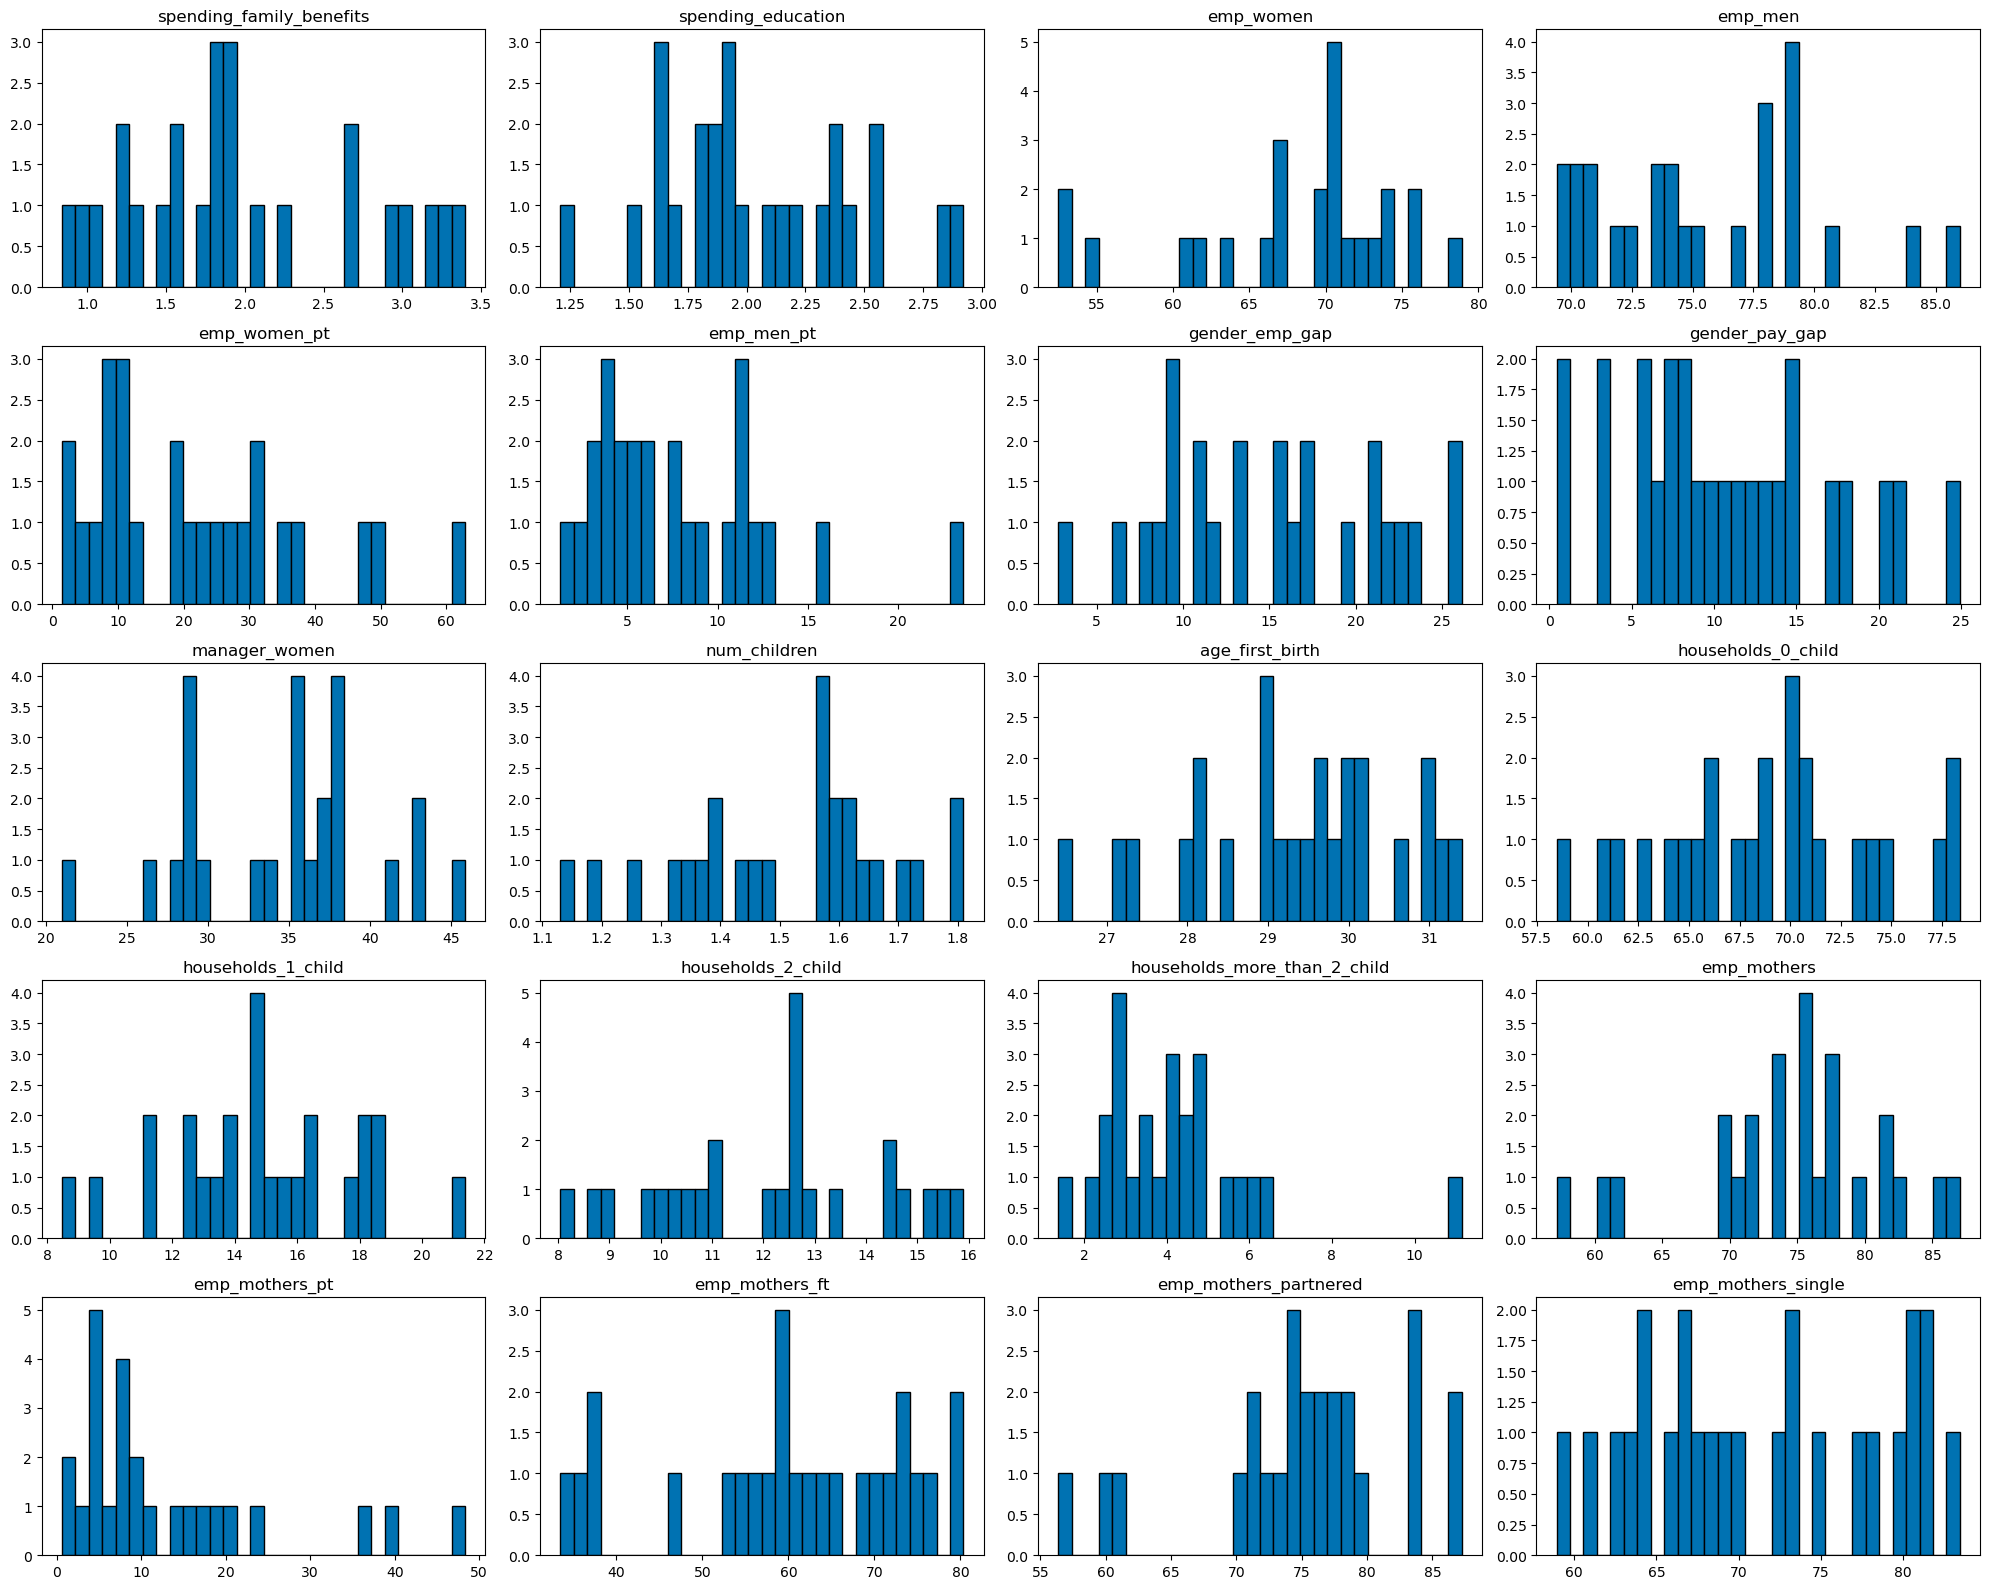

In [49]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

### <span style="color: #ec300e;">Boxplots</span>

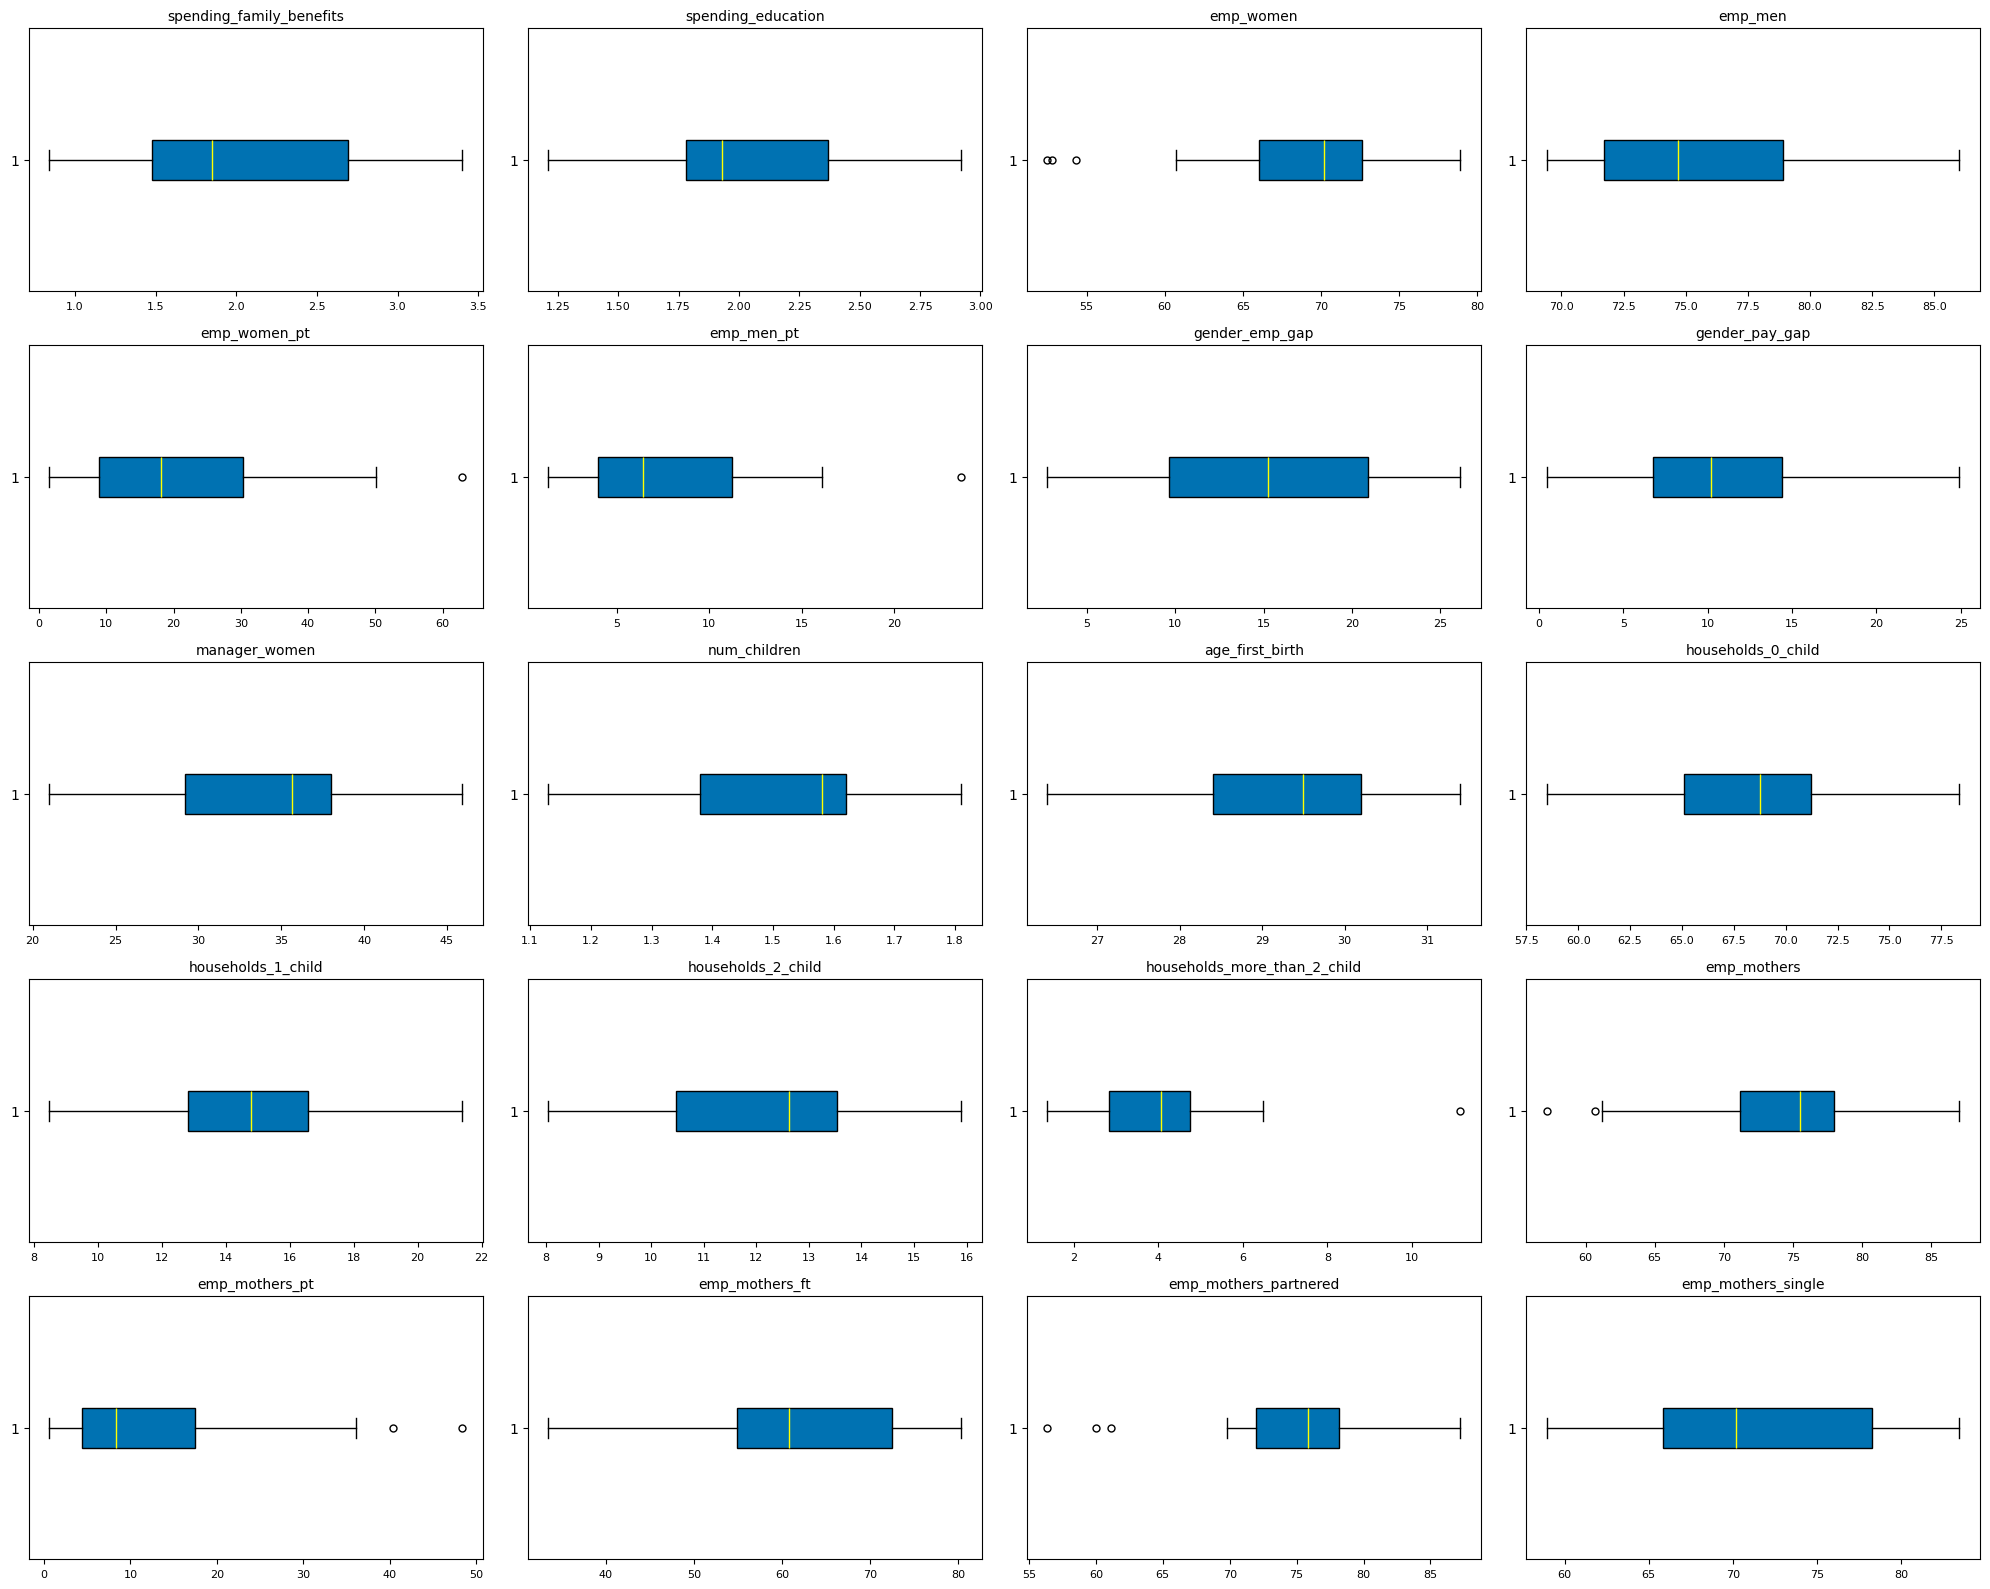

In [67]:
# boxplots for all num columns

color = '#0072B2'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Summarizing Conclusions from Measures, Histograms and Boxplots:</strong>
    <ul>
        <li>Most variables show a <strong>similar distribution</strong> with little outliers.</li>
        <li>Yet some variables have a <strong>wide dispersion between countries</strong>, especially regarding the employment sector ("emp_women_pt", "emp_mothers_pt").</li>
        <li>In the histograms, we can see some variables with a <strong>multimodal distribution</strong>, they show several peaks which might indicate heterogenous groups among the countries.</li>
        <li>Some variables show <strong>outliers</strong> in the boxplots which are far outside the whiskers, so <strong>some countries seem to be very different to others</strong> in specific columns ("emp_women_pt", "emp_mothers_pt", "gender_pay_gap", "households_more_than_2_child").</li>
        <li>Several variables are <strong>strongly skewed to the right</strong> which indicates some very high values.</li>
        <li>Some variables show a <strong>great standard deviation</strong>, this again indicates towards great differences between countries.</li>
    </ul>
    <strong>Highlights: Differences Between Countries</strong>
    <ul>
        <li>Variables regarding <strong>labour market participation of women</strong> show a great dispersion, so there seem to be significant differences between countries.</li>
        <li>The <strong>full paid leave for mothers/ fathers</strong> show a great dispersion as well.</li>
        <li>Gender specific differences like the <strong>employment gap and the pay gap</strong> also show a great dispersion and therefore differences between countries.</li>
    </ul>
</div>

## <span style="color: #ec7511;">Target Variable: "emp_mothers"</span>

In [85]:
emp_mothers_per_country = eu_df.groupby("country")["emp_mothers"].mean().sort_values(ascending=False)
emp_mothers_per_country

country
Slovenia      87.03
Portugal      85.47
Sweden        82.87
Netherlands   81.81
Denmark       81.62
Lithuania     79.35
Luxembourg    77.96
Croatia       77.79
Finland       77.08
Hungary       77.00
Latvia        75.56
Austria       75.56
Belgium       75.53
Estonia       75.23
France        73.86
Germany       73.84
Cyprus        73.18
Ireland       71.34
Bulgaria      71.13
Poland        71.04
Malta         69.75
Spain         69.52
Greece        61.16
Romania       60.70
Italy         57.18
Name: emp_mothers, dtype: float64

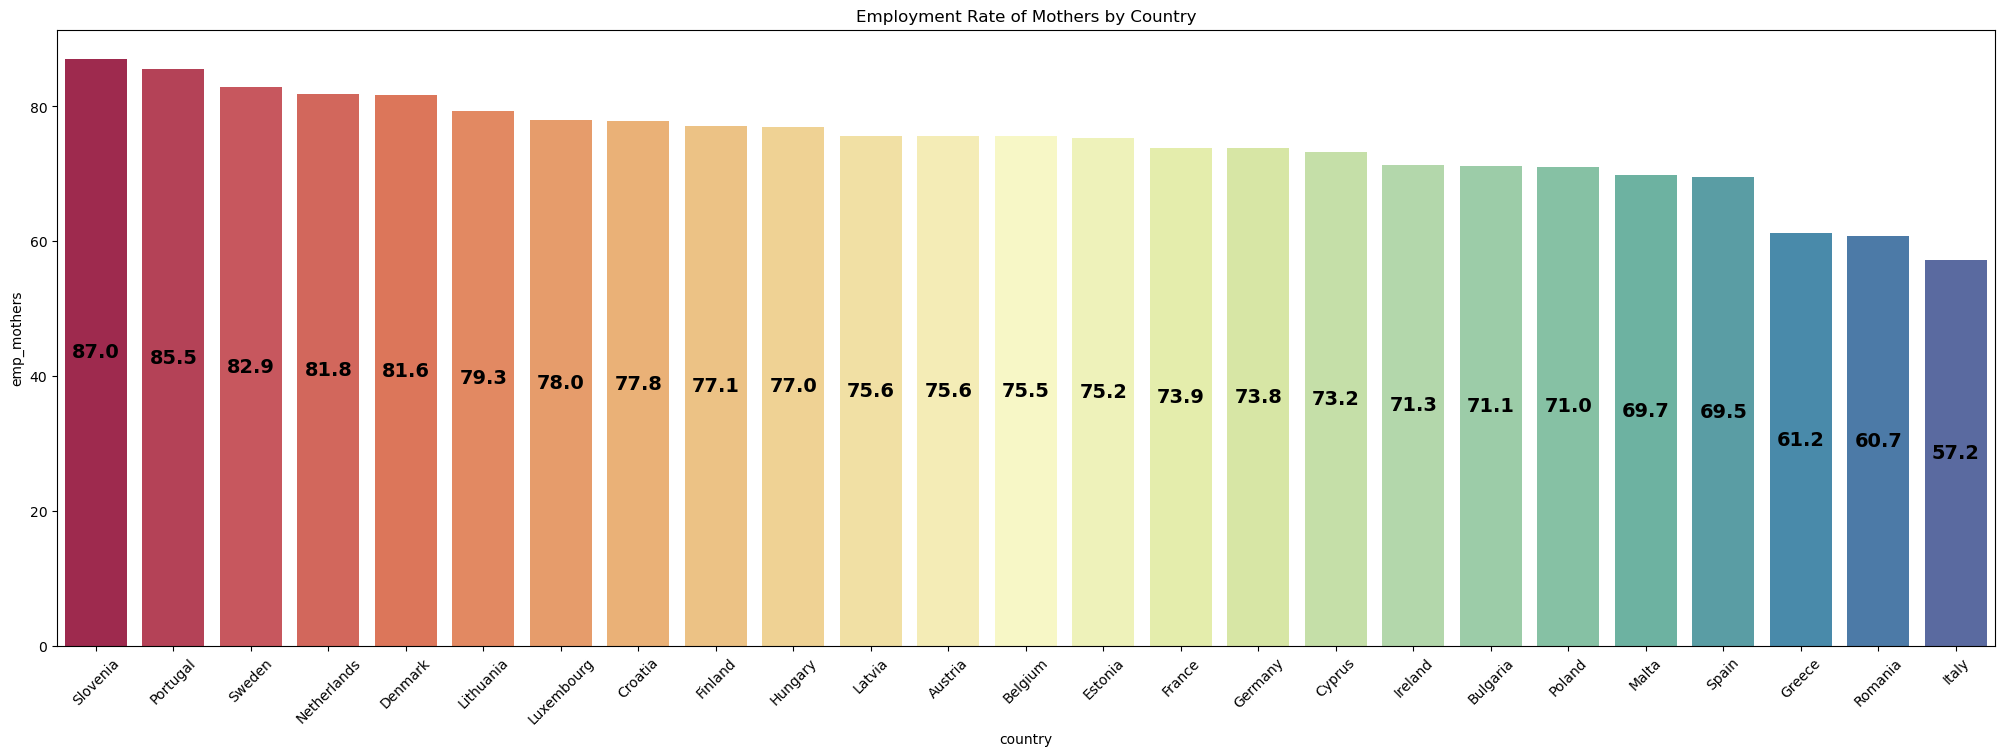

In [103]:
df_emp_mothers_country = eu_df.sort_values(by="emp_mothers", ascending=False)

plt.figure(figsize=(25, 8))
ax = sns.barplot(data=df_emp_mothers_country, x="country", y="emp_mothers", palette="Spectral")

# numbers on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=14, color='black', fontweight='bold', label_type='center')

plt.title('Employment Rate of Mothers by Country')
plt.xticks(rotation=45)
plt.show()


## <span style="color: #ec7511;">Correlation Analysis with "emp_mothers"</span>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Selecting Features for EDA:</strong>
<p>To find out which variables are promising for further exploratory data analysis, I will first calculate the correlations they have with the target. After this, I will formulate hypotheses on these variables (or those, this will be possible for).</p>
</div>

### <span style="color: #ec300e;">Pearson Correlation: Linear Relationships</span>

In [ ]:
# pearson correlation with target "emp_mothers"
correlation_matrix_pearson = num.corr()
correlations_pearson = correlation_matrix_pearson["emp_mothers"].drop("emp_mothers")  # not showing the correlation with itself

# sorting by strength of correlation
correlations_pearson_sorted = correlations_pearson.abs().sort_values(ascending=False)

correlations_pearson_sorted


emp_mothers_partnered                 0.99
emp_mothers_2_young_child             0.97
emp_mothers_1_young_child             0.94
emp_mothers_child_younger_than_6      0.90
emp_mothers_child_6_11                0.88
emp_mothers_more_than_2_young_child   0.83
emp_mothers_med_edu                   0.82
emp_women                             0.76
emp_mothers_single                    0.72
emp_mothers_low_edu                   0.61
gender_emp_gap                        0.59
emp_mothers_high_edu                  0.55
spending_education                    0.50
emp_fathers_child_younger_than_6      0.49
emp_mothers_ft                        0.47
emp_fathers_child_6_11                0.44
emp_men                               0.33
emp_men_pt                            0.32
fathers_full_paid_leave               0.29
num_children                          0.23
households_1_child                    0.21
spending_family_benefits              0.21
manager_women                         0.17
emp_women_p

### <span style="color: #ec300e;">Spearman Correlation: Monotonic Relationships</span>

In [ ]:
# spearman correlation with target "emp_mothers"
correlation_matrix_spearman = num.corr(method="spearman")
correlations_spearman = correlation_matrix_spearman["emp_mothers"].drop("emp_mothers")

correlations_spearman_sorted = correlations_spearman.abs().sort_values(ascending=False)

correlations_spearman_sorted


emp_mothers_partnered                 0.97
emp_mothers_1_young_child             0.95
emp_mothers_2_young_child             0.94
emp_mothers_more_than_2_young_child   0.84
emp_mothers_child_6_11                0.83
emp_mothers_child_younger_than_6      0.81
emp_mothers_single                    0.78
emp_mothers_med_edu                   0.76
emp_mothers_low_edu                   0.67
emp_women                             0.56
emp_mothers_ft                        0.53
gender_emp_gap                        0.53
emp_mothers_high_edu                  0.49
emp_fathers_child_6_11                0.46
spending_education                    0.44
fathers_full_paid_leave               0.44
emp_fathers_child_younger_than_6      0.42
households_1_child                    0.35
emp_men_pt                            0.28
num_children                          0.27
households_0_child                    0.26
emp_men                               0.24
spending_family_benefits              0.22
gender_pay_

### <span style="color: #ec300e;">Kendall Correlation: Monotonic and Non-Normally Distributed</span>

In [ ]:
# kendall correlation with target "emp_mothers"
correlation_matrix_kendall = num.corr(method="kendall")
correlations_kendall = correlation_matrix_kendall["emp_mothers"].drop("emp_mothers")

correlations_kendall_sorted = correlations_kendall.abs().sort_values(ascending=False)

correlations_kendall_sorted

emp_mothers_partnered                 0.90
emp_mothers_1_young_child             0.83
emp_mothers_2_young_child             0.83
emp_mothers_more_than_2_young_child   0.69
emp_mothers_child_6_11                0.66
emp_mothers_child_younger_than_6      0.66
emp_mothers_single                    0.57
emp_mothers_med_edu                   0.57
emp_mothers_low_edu                   0.49
emp_women                             0.43
emp_mothers_ft                        0.41
gender_emp_gap                        0.39
emp_mothers_high_edu                  0.37
fathers_full_paid_leave               0.32
emp_fathers_child_6_11                0.32
spending_education                    0.30
emp_fathers_child_younger_than_6      0.29
households_1_child                    0.27
emp_men_pt                            0.21
households_0_child                    0.17
num_children                          0.16
emp_men                               0.16
spending_family_benefits              0.13
emp_women_p

### <span style="color: #ec300e;">Overview of Correlations and Combined Correlation</span>

In [ ]:
# reset index and rename columns
df_pearson = correlations_pearson_sorted.reset_index().rename(columns={"index": "Column", "emp_mothers": "Correlation_pearson"})
df_spearman = correlations_spearman_sorted.reset_index().rename(columns={"index": "Column", "emp_mothers": "Correlation_spearman"})
df_kendall = correlations_kendall_sorted.reset_index().rename(columns={"index": "Column", "emp_mothers": "Correlation_kendall"})

# merge the three dataframes
df_combined = df_pearson.merge(df_spearman, on="Column", how="outer")
df_combined = df_combined.merge(df_kendall, on="Column", how="outer")

# calculate the mean correlation and sorting by it
df_combined["mean_Correlation"] = df_combined[["Correlation_pearson", "Correlation_spearman", "Correlation_kendall"]].mean(axis=1)
df_combined_sorted = df_combined.sort_values(by="mean_Correlation", ascending=False)

df_combined_sorted


,Column,Correlation_pearson,Correlation_spearman,Correlation_kendall,mean_Correlation
14,emp_mothers_partnered,0.99,0.97,0.90,0.95
6,emp_mothers_2_young_child,0.97,0.94,0.83,0.91
5,emp_mothers_1_young_child,0.94,0.95,0.83,0.91
7,emp_mothers_child_6_11,0.88,0.83,0.66,0.79
8,emp_mothers_child_younger_than_6,0.90,0.81,0.66,0.79
13,emp_mothers_more_than_2_young_child,0.83,0.84,0.69,0.79
12,emp_mothers_med_edu,0.82,0.76,0.57,0.71
16,emp_mothers_single,0.72,0.78,0.57,0.69
11,emp_mothers_low_edu,0.61,0.67,0.49,0.59
17,emp_women,0.76,0.56,0.43,0.59


<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Subset:</strong>
<p>Based on the above correlation analysis, I will now formulate hypotheses for further exploratory analysis and create a subset with variables needed for the hypotheses analysis. This does not make sense for all of the variables which have a high or medium correlation with the target because some are self-explanatory (i.e. high correlation with emp_women and also with the number of young children a woman has). Also, I will still analyse spending_family_benefits even though it only shows a medium low correlation out of interest because I suspected this to be more influential.</p>
</div>

## <span style="color: #ec7511;">Hypotheses</span>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
<strong>Hypotheses:</strong>
<p>After cleaning the data, I will analyze the following hypotheses, solely using EDA. The hypotheses were created following some research and also the analysts interests and assumptions. They naturally present a limitation because not all data can be analysed right now. Yet, I did try to find an interesting and also promising set of hyptheses.</p>
<ul>
    <li><strong>1. (Public) Support</strong>
        <ul>
            <li><strong>H1:</strong> Countries with higher public spending on family benefits have a smaller gender employment gap.</li>
            <li><strong>H2:</strong> Countries with higher public spending on family benefits show a smaller employment gap between single and partnered mothers.</li>
            <li><strong>H3:</strong> Countries with longer fully paid parental leave for fathers have a higher maternal employment rate.</li>
        </ul>
            <li><strong>2. Maternal Education</strong>
        <ul>
            <li><strong>H4:</strong> The higher the education, the higher the employment rate. NOCH MAL BEARBEITEN UND ÜBERDENKEN</li>
        </ul>
    </li>
    <li><strong>2. Gender Differences in Workforce Participation</strong>
        <ul>
            <li><strong>H5:</strong> Countries with a higher proportion of female managers have higher maternal employment rates.</li>
            <li><strong>H6:</strong> In countries where more men work part-time, maternal employment rates are higher.</li>
            <li><strong>H7:</strong> In countries with a lower gender pay-gap, maternal employment rates are higher.</li>
        </ul>
    </li>
</ul>
</div>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Additional Data</strong>
<p>To analyse the above hypotheses, some of the columns are not needed. For the following EDA, I will create new df which only contains the data needed for analysing the hypotheses.</p>
</div>

In [105]:
eda_df = eu_df[['country', 'emp_mothers', 'spending_family_benefits',
                'fathers_full_paid_leave', 'gender_emp_gap',
                'emp_mothers_partnered', 'emp_mothers_single',
                'manager_women', 'emp_men_pt', 'gender_pay_gap',
                "emp_mothers_low_edu", "emp_mothers_med_edu",
                "emp_mothers_high_edu"]]
eda_df.shape

(25, 13)

In [71]:
eda_df.columns

Index(['country', 'emp_mothers', 'spending_family_benefits',
       'fathers_full_paid_leave', 'gender_emp_gap', 'emp_mothers_partnered',
       'emp_mothers_single', 'manager_women', 'emp_men_pt', 'gender_pay_gap'],
      dtype='object')

### <span style="color: #ec300e;">Hypothesis 1: </span>
<p>(Public) Support: Countries with higher public spending on family benefits have a smaller gender employment gap.</p>

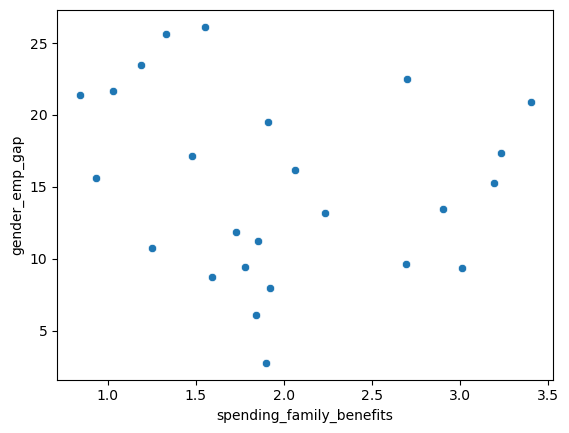

In [106]:
sns.scatterplot(data=eda_df, x='spending_family_benefits', y='gender_emp_gap')
plt.show()

In [108]:
eda_df["spending_family_benefits"].corr(eda_df["gender_emp_gap"])

-0.15364132550846857

Interpretation:

Scatterplot:

Die Punkte im Diagramm zeigen eine leichte Tendenz nach unten, sind aber relativ verstreut, was auf eine geringe Korrelation hindeutet.
Es gibt keine klare lineare Beziehung zwischen den beiden Variablen.

Korrelationskoeffizient (-0.1536):

Ein negativer Wert bedeutet, dass höhere Ausgaben für Familienleistungen tendenziell mit einer geringeren geschlechtsspezifischen Beschäftigungslücke verbunden sind.
Allerdings ist die Korrelation mit -0.15 schwach, sodass die Beziehung möglicherweise nicht signifikant ist oder durch andere Faktoren überlagert wird.

### <span style="color: #ec300e;">Hypothesis 2: </span>
<p>(Public) Support: Countries with higher public spending on family benefits show a smaller employment gap between single and partnered mothers.</p>

Boxplot: emp_mothers_single vs. emp_mothers_partnered, grouped by spending_family_benefits

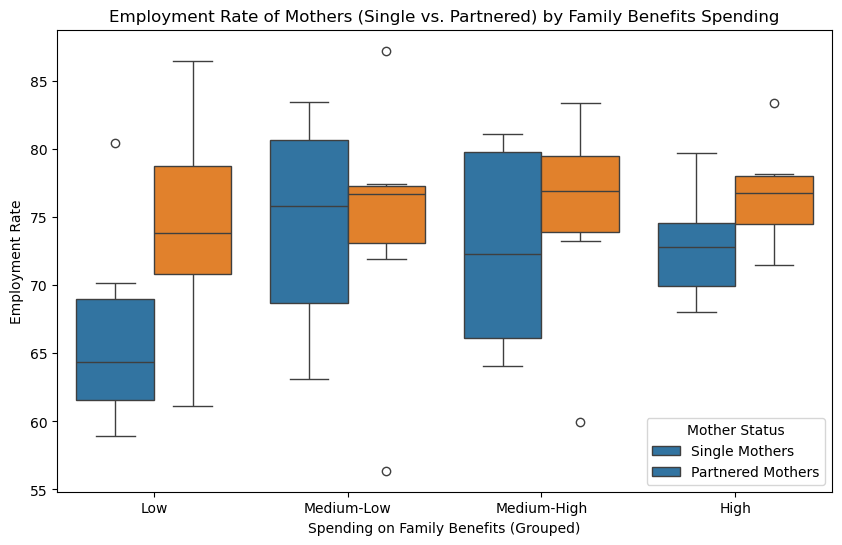

In [109]:
# creating categories for the spending on family benefits
eda_df['spending_category'] = pd.qcut(eda_df['spending_family_benefits'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=eda_df.melt(id_vars=['spending_category'], value_vars=['emp_mothers_single', 'emp_mothers_partnered']),
            x='spending_category', y='value', hue='variable')

plt.xlabel("Spending on Family Benefits (Grouped)")
plt.ylabel("Employment Rate")
plt.title("Employment Rate of Mothers (Single vs. Partnered) by Family Benefits Spending")
plt.legend(title="Mother Status", labels=["Single Mothers", "Partnered Mothers"])
plt.show()

Interpretation des Boxplots

1. Vergleich der Beschäftigungsraten von alleinerziehenden vs. verheirateten/partnernden Müttern
Partnered Mothers (orange) haben durchgehend höhere Median-Beschäftigungsraten als Single Mothers (blau) in allen Kategorien der spending_family_benefits.
Die Unterschiede zwischen den Gruppen sind jedoch je nach Niveau der Familienleistungen unterschiedlich ausgeprägt.

2. Zusammenhang mit den Ausgaben für Familienleistungen
Niedrige Ausgaben (Low):
    Partnered Mothers haben eine breite Streuung mit einem relativ hohen Median.
    Single Mothers haben niedrigere Beschäftigungsraten und eine breitere Varianz.
Mittlere Ausgabenkategorien (Medium-Low & Medium-High):
    Partnered Mothers zeigen eine stabilere Beschäftigungsrate mit einem engeren Interquartilsbereich (weniger Streuung).
    Single Mothers haben in Medium-Low eine leicht steigende Medianrate, aber mit einigen niedrigen Ausreißern.
Hohe Ausgaben (High):
    Der Unterschied zwischen den beiden Gruppen wird geringer, die Medianwerte nähern sich stärker an.
    Die Streuung in der Beschäftigung von Single Mothers ist kleiner als bei niedrigen Ausgaben.

3. Allgemeine Trends
Höhere Ausgaben für Familienleistungen scheinen mit einer allgemein stabileren Beschäftigungsrate für Mütter verbunden zu sein.
Der Unterschied zwischen Single und Partnered Mothers ist bei niedrigen Ausgaben am größten.
Bei höheren Ausgaben scheinen Single Mothers im Vergleich zu den anderen Kategorien tendenziell bessere Beschäftigungsraten zu haben.

Fazit:
Höhere Familienleistungen könnten dazu beitragen, die Beschäftigung von alleinerziehenden Müttern zu stabilisieren.
Partnered Mothers profitieren durchweg von höheren Beschäftigungsraten, möglicherweise durch zusätzliche finanzielle Sicherheit oder Betreuung durch den Partner.
Politische Implikation: Eine gezieltere Unterstützung für alleinerziehende Mütter könnte helfen, die Beschäftigungslücke zwischen beiden Gruppen zu verringern.

### <span style="color: #ec300e;">Hypothesis 3: </span>
<p>(Public) Support: Countries with longer fully paid parental leave for fathers have a higher maternal employment rate.</p>

Scatterplot: fathers_full_paid_leave vs. emp_mothers;
regression line

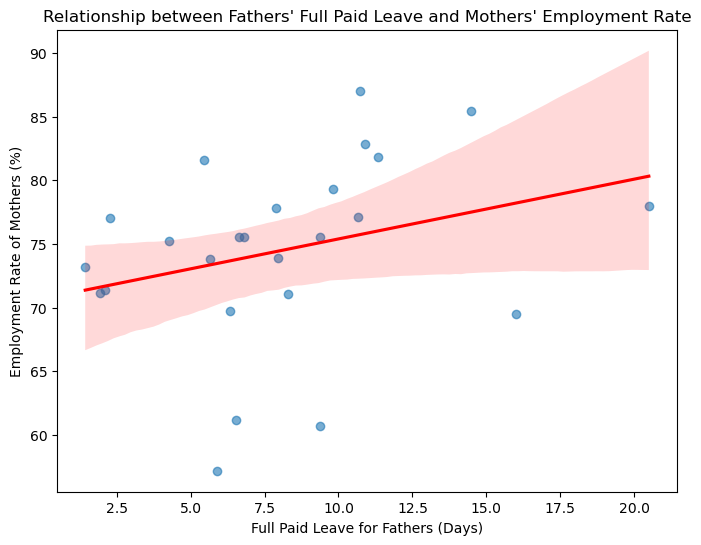

In [110]:
# scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=eda_df, x="fathers_full_paid_leave", y="emp_mothers", scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

# labels
plt.xlabel("Full Paid Leave for Fathers (Days)")
plt.ylabel("Employment Rate of Mothers (%)")
plt.title("Relationship between Fathers' Full Paid Leave and Mothers' Employment Rate")

plt.show()

Interpretation des Scatterplots mit Regressionslinie

Allgemeiner Trend
    Die rote Regressionslinie zeigt eine positive Korrelation zwischen fathers_full_paid_leave (Väter mit voller Lohnfortzahlung in Tagen) und emp_mothers (Beschäftigungsrate von Müttern).
    Das bedeutet, dass in Ländern, in denen Väter längeren bezahlten Elternurlaub haben, tendenziell mehr Mütter erwerbstätig sind.

Stärke der Korrelation
    Der Anstieg der Regressionslinie ist moderat. Das bedeutet, dass es zwar einen positiven Zusammenhang gibt, dieser aber nicht extrem stark ausgeprägt ist.
    Der Konfidenzbereich (roter Schattierungsbereich) zeigt, dass die Unsicherheit der Schätzung zunimmt, besonders bei höheren Werten für fathers_full_paid_leave.

Datenverteilung
    Die Punktwolke zeigt einige Ausreißer, z. B. Länder mit relativ wenigen bezahlten Vätern-Tagen, aber sehr unterschiedlichen Beschäftigungsraten für Mütter.
    Besonders bei höheren Werten für fathers_full_paid_leave gibt es größere Streuung in den Beschäftigungsraten von Müttern.

Mögliche Interpretation
    Politische Bedeutung: Eine stärkere Inanspruchnahme von bezahltem Vaterschaftsurlaub könnte eine gleichmäßigere Aufteilung der Familienpflichten fördern, was wiederum die Beschäftigung von Müttern erleichtert.
    Alternative Erklärungen: Andere Faktoren (z. B. kulturelle Normen, Betreuungsinfrastruktur) könnten ebenfalls eine Rolle spielen und sollten in weiterführenden Analysen berücksichtigt werden.

Fazit:
Es gibt eine positive, aber nicht sehr starke Korrelation zwischen der Dauer des bezahlten Vaterschaftsurlaubs und der Erwerbstätigkeit von Müttern. Weitere Faktoren könnten die Variabilität der Daten beeinflussen.

### <span style="color: #ec300e;">Hypothesis 4: </span>
<p>Gender Differences in Workforce Participation: Countries with a higher proportion of female managers have higher maternal employment rates.</p>

Scatterplot: manager_women vs. emp_mothers;
correlation calculation

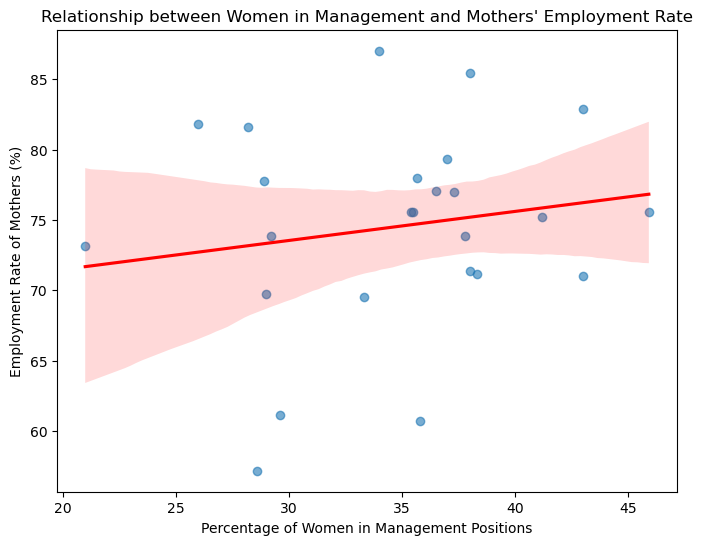

In [111]:
# scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=eda_df, x="manager_women", y="emp_mothers", scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

# labels
plt.xlabel("Percentage of Women in Management Positions")
plt.ylabel("Employment Rate of Mothers (%)")
plt.title("Relationship between Women in Management and Mothers' Employment Rate")

plt.show()


In [112]:
correlation = eda_df["manager_women"].corr(eda_df["emp_mothers"])
print(f"Correlation coefficient: {correlation:.4f}")

Correlation coefficient: 0.1679


### <span style="color: #ec300e;">Hypothesis 5: </span>
<p>Gender Differences in Workforce Participation: In countries where more men work part-time, maternal employment rates are higher.</p>

Scatterplot: emp_men_pt vs. emp_mothers;
correlation calculation

### <span style="color: #ec300e;">Hypothesis 6: </span>
<p>Gender Differences in Workforce Participation: In countries with a lower gender pay-gap, maternal employment rates are higher.</p>

Scatterplot: gender_pay_gap vs. emp_mothers;
regression line

## <span style="color: #ec7511;">Looking for Correlations</span>

In [ ]:
cat = df.select_dtypes(exclude="number")
num = df.select_dtypes(include="number")

In [ ]:
num_corr = round(num.corr(), 2)

In [ ]:
<div class="alert alert-block alert-info">
Tip # 4
    
- We don't want multicolinearity --> correlation between features biases the model...
- We want high correlations (+ or -) with the target --> valuable information for the predictions</div>

In [ ]:
# Correlation Matrix-Heatmap Plot which shows only half of numbers (so no doubles)
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

### Exercise 4: How to interpret this correlation matrix? Which other correlation methods we know?

### Specific Correlations with the Target

### Perform 3 Plots and Explain the Findings from the Data

### Contigency Tables, Chi-Square...

# <span style="color: #e3db24;">04 | Data Processing</span>

## <span style="color: #ec7511;">Moving the Target to the Right</span>

In [ ]:
#eu_df = eu_df[[col for col in eu_df.columns if col != "emp_women"] + ["emp_women"]]
#df_women = eu_df[[col for col in eu_df.columns if col != "emp_women"] + ["emp_women"]]
#df_mothers = eu_df[[col for col in eu_df.columns if col != "emp_mothers"] + ["emp_mothers"]]

## <span style="color: #ec7511;">X-Y Split</span>

## <span style="color: #ec7511;">Normalizing the Data</span>

# <span style="color: #e3db24;">05 | Modeling</span>

## <span style="color: #ec7511;">Train-Test Split</span>

## <span style="color: #ec7511;">Model Validation</span>

# <span style="color: #e3db24;">06 | Improving the Model</span>

# <span style="color: #e3db24;">07 | Reporting</span>